In [316]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [391]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)
X,y

(array([[ 0.35523945, -0.11697552],
        [-0.09282829, -0.73115232],
        [-0.1984984 , -0.7081059 ],
        [-2.44001098, -2.01199214],
        [-0.0448475 ,  1.63493163],
        [-1.68155714,  0.15599044],
        [-2.64121606,  1.07782053],
        [ 0.2416527 ,  0.80626713],
        [-0.40266099,  0.74859527],
        [-2.80888854,  0.75152794],
        [-2.62743539, -0.90114581],
        [-2.62900445, -0.1815243 ],
        [ 0.13405049, -2.98092432],
        [ 0.96162631,  1.20500136],
        [-2.67615806,  0.78302407],
        [ 0.54329928,  0.42968688],
        [ 0.01490532, -0.73229726],
        [-2.72870533, -0.83930476],
        [-0.02633711,  0.83727062],
        [-2.61974125, -0.10255323],
        [-3.1257262 ,  0.65867001],
        [-2.91434094,  0.92649819],
        [-2.16605143,  0.10216193],
        [ 1.76642459,  0.46886454],
        [-2.06564986,  0.45432938],
        [ 0.7699643 ,  1.8613386 ],
        [-2.63675549, -0.79255991],
        [-1.89063753, -1.000

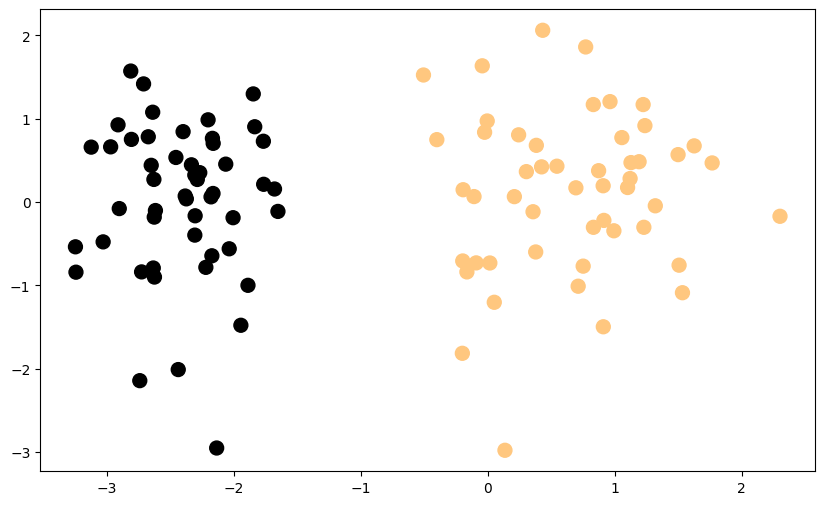

In [392]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper',s=100)

In [393]:
def step(f):
  return 1 if f>0 else 0

In [394]:
def perceptron(X,y,learning_rate=0.1,epoch=1000):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  for i in range(epoch):
    j=np.random.randint(0,X.shape[0])
    y_hat=step(np.dot(X[j],weights))
    weights=weights+learning_rate*(y[j]-y_hat)*X[j]
  return weights[0],weights[1:]

In [419]:
b,coef_=perceptron(X,y,epoch=200)

In [420]:
b

np.float64(1.1)

In [421]:
coef_

array([1.16971525, 0.56816915])

In [422]:
m = -(coef_[0]/coef_[1])
b = -(b/coef_[1])

In [423]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

Text(0.5, 1.0, '100 epochs')

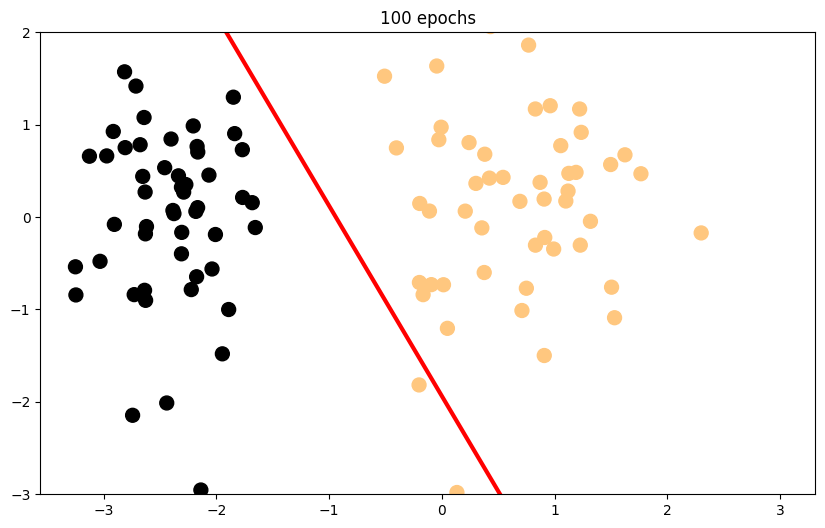

In [418]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper',s=100)
plt.ylim(-3,2)
plt.title('100 epochs')

Text(0.5, 1.0, '200 epochs')

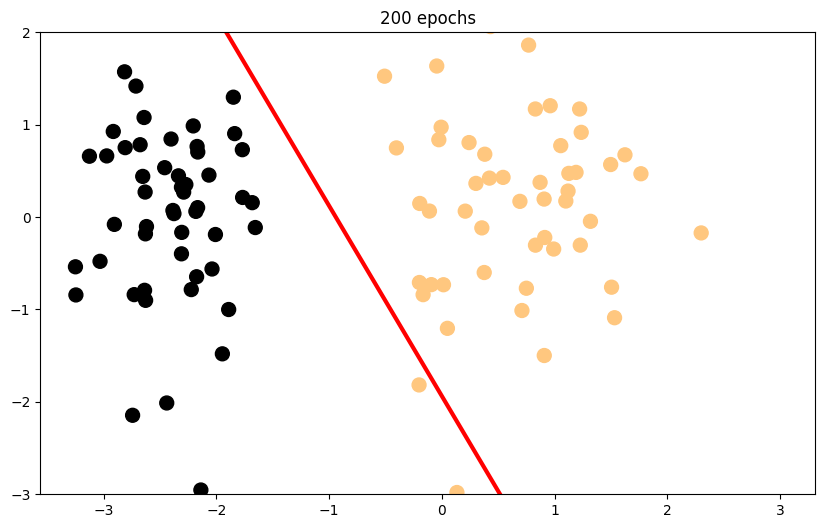

In [424]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper',s=100)
plt.ylim(-3,2)
plt.title('200 epochs')

Text(0.5, 1.0, '1000 epochs')

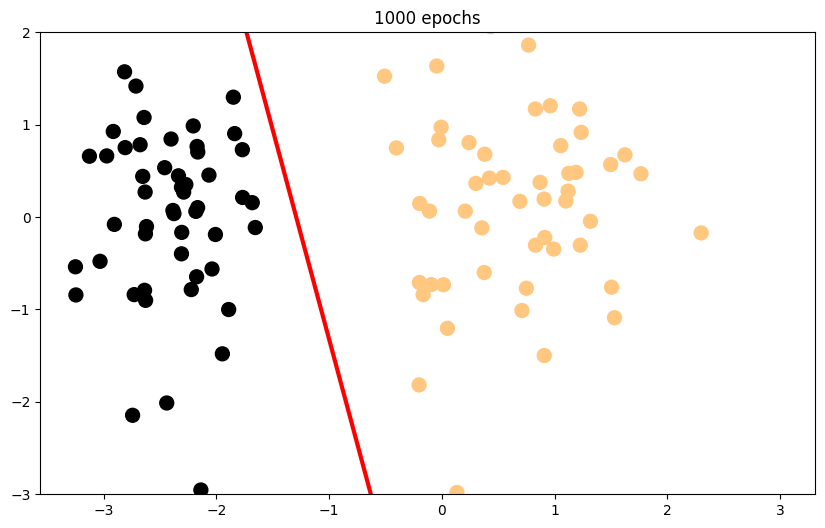

In [402]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper',s=100)
plt.ylim(-3,2)
plt.title('1000 epochs')

But we cannot tell that this line is the best fitted line so we need to introduce a loss function

**Perceptron with loss function**

In [403]:
#loss=1/n summation (max(0,-yi(fxi)))

In [408]:
def perceptron_loss(X, y, learning_rate=0.1, epoch=1):
    b = 1.0
    weights = np.ones(X.shape[1])

    for _ in range(epoch):
        for i in range(X.shape[0]):
            z = weights[0]*X[i][0] + weights[1]*X[i][1] + b
            if z * y[i] < 0:
                weights[0] += learning_rate * y[i] * X[i][0]
                weights[1] += learning_rate * y[i] * X[i][1]
                b += learning_rate * y[i]

    return weights[0], weights[1], b


In [409]:
w1,w2,b=perceptron_loss(X,y,epoch=1020)

In [410]:
m = -(w1/w2)
c = -(b/w2)
m,c

(np.float64(-4.531321834268464), np.float64(-5.851870329508209))

(-3.0, 2.0)

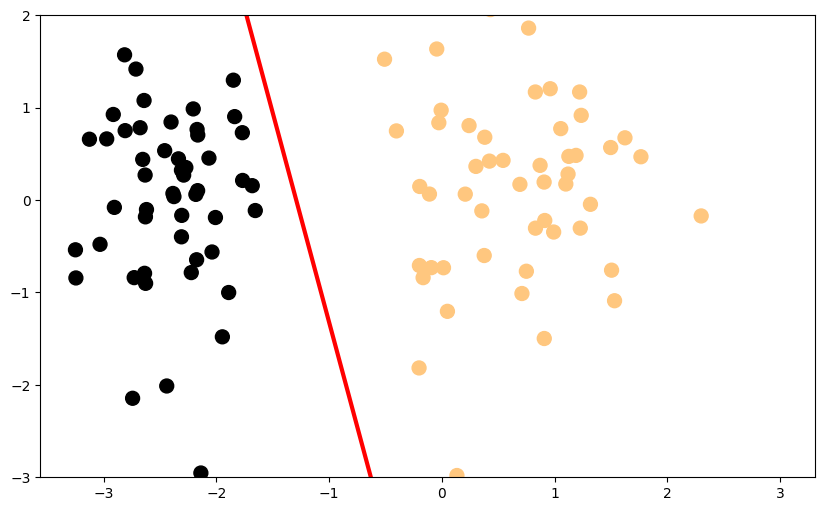

In [412]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='copper',s=100)
plt.ylim(-3,2)

In [ ]:
#

perceptron is very flexible mathematical model


*   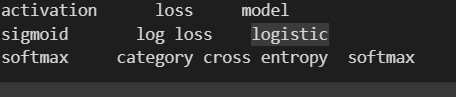


